# One click for InferCNV-like results (~3min)
CNA detection in 600 10x single cells with XClone RDR module, Use **xcltk RDR** matrix as input.

In [7]:
# !mkdir data
# !wget https://raw.githubusercontent.com/Rongtingting/xclone-data/main/GX109-T1c_600cells_workshop2024/rdr_xcltk.tar.gz -O data/rdr_xcltk.tar.gz
# !cd data; tar -xzf rdr_xcltk.tar.gz
# !mkdir result
# !ls -l data/rdr_xcltk

--2024-07-07 22:02:02--  https://raw.githubusercontent.com/Rongtingting/xclone-data/main/GX109-T1c_600cells_workshop2024/rdr_xcltk.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8182317 (7.8M) [application/octet-stream]
Saving to: ‘data/rdr_xcltk.tar.gz’

100%[======================================>] 8,182,317   78.2KB/s   in 97s    

2024-07-07 22:03:40 (82.5 KB/s) - ‘data/rdr_xcltk.tar.gz’ saved [8182317/8182317]

total 26007
-rw-r----- 1 rthuang yuanhua    11400 Jul  4 14:54 barcodes.tsv
-rw-r----- 1 rthuang yuanhua    36861 Jul  4 15:12 cell_anno.tsv
-rw-r----- 1 rthuang yuanhua   973171 Jul  4 14:54 features.tsv
-rw-r----- 1 rthuang yuanhua 32344381 Jul  4 14:55 matrix.mtx


In [2]:
#!pip install xclone

In [8]:
import os
import numpy as np
import scanpy as sc


In [9]:
import xclone

In [10]:
rdr_dir = "./data/rdr_xcltk/"
cell_anno_file = "./data/rdr_xcltk/cell_anno.tsv"
out_dir = "./result/"

## Load data

In [11]:
RDR_file = os.path.join(rdr_dir, "matrix.mtx")
mtx_barcodes_file = os.path.join(rdr_dir, "barcodes.tsv")

RDR_adata = xclone.pp.xclonedata(
    RDR_file,
    'RDR',
    mtx_barcodes_file,
    genome_mode = "hg38_genes",
    data_notes = None
)

RDR_adata = xclone.pp.extra_anno(
    RDR_adata,
    cell_anno_file,
    barcodes_key = "cell",
    cell_anno_key = "cell_type",
    sep = "\t"
)

RDR_adata

/home/rthuang/anaconda3/envs/xclone_dev/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 600 × 33472
    obs: 'cell_type', 'UMAP1', 'UMAP2'
    var: 'GeneName', 'GeneID', 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band'
    uns: 'log', 'data_mode', 'genome_mode', 'data_notes'
    layers: 'raw_expr'

## UMAP Plotting

In [12]:
RDR_adata.obsm["X_umap"] = np.zeros(RDR_adata.shape)
RDR_adata.obsm["X_umap"][:, 0] = RDR_adata.obs["UMAP1"]
RDR_adata.obsm["X_umap"][:, 1] = RDR_adata.obs["UMAP2"]
RDR_adata.obsm["X_umap"]

array([[16.434483 ,  2.0399697,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [16.33916  , -1.5799097,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [16.635555 , 14.148827 ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 0.8078782,  6.06889  ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [17.1987   , -0.7916984,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [14.759416 , -2.370602 ,  0.       , ...,  0.       ,  0.       ,
         0.       ]])

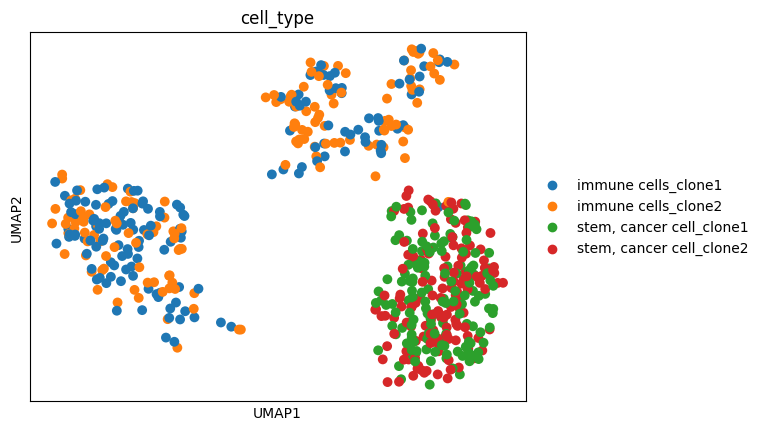

In [13]:
sc.pl.umap(RDR_adata, color = "cell_type")

## RDR module

In [14]:
dataset_name = "10x_600cell"

xconfig = xclone.XCloneConfig(
    dataset_name = dataset_name,
    module = "RDR"
)

xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = out_dir
xconfig.cell_anno_key = "cell_type"
xconfig.ref_celltype = "immune cells_clone1"
xconfig.top_n_marker = 25
xconfig.marker_group_anno_key = "cell_type"
xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "cell_type"
xconfig.trans_t = 1e-6
xconfig.start_prob = np.array([0.3, 0.4, 0.3])
xconfig.display()

RDR 
Configurations:
HMM_brk                        chr_arm
KNN_neighbors                  10
WMA_smooth_key                 chr_arm
WMA_window_size                40
_file_format_data              h5ad
_file_format_figs              pdf
_frameon                       True
_outdir                        result
_plot_suffix                   
_start                         1720361071.6104248
_vector_friendly               True
cell_anno_key                  cell_type
dataset_name                   10x_600cell
dispersion_celltype            None
exclude_XY                     False
file_format_data               h5ad
file_format_figs               pdf
filter_ref_ave                 0.5
fit_GLM_libratio               False
gene_exp_group                 1
gene_exp_ref_log               True
get_marker_genes               True
guide_chr_anno_key             chr_arm
guide_cnv_ratio                None
guide_qt_lst                   [0.0001, 0.96, 0.99]
marker_group_anno_key          cell_ty

[XClone RDR module running]************************
[XClone data preprocessing] check RDR raw dataset value: success
Keep valid cells: Filter out 0 cells / 600 total cells, remain 600 valid cells with annotation
[XClone data preprocessing] check RDR cell annotation: success
[XClone-RDR preprocessing] Filter out 18432 genes / 33472 total genes, remain 15040 genes
[XClone data preprocessing] detect RDR genes: done
[XClone-RDR preprocessing] Filter out 11353 genes / 15040 total genes, remain 3687 genes
[XClone-RDR preprocessing] Filter out 0 cells / 600 total cells, remain 600 cells
[XClone] use marker genes provided by users: 
 ['AC011450.1' 'AC012645.3' 'AC136475.1' 'ACSL5' 'AL390957.1' 'ANXA5' 'APP'
 'ARHGDIB' 'ASPH' 'B2M' 'BTF3' 'CD37' 'CD44' 'CD9' 'CHURC1' 'CHURC1-FNTB'
 'CORO1A' 'COTL1' 'CYSTM1' 'DDOST' 'DSTN' 'ERGIC3' 'FYB1' 'GMDS' 'GMFG'
 'GSTP1' 'HCLS1' 'HLA-DPA1' 'HLA-DPB1' 'HLA-DQA1' 'HLA-E' 'HMGA1' 'HSPA1A'
 'IFITM3' 'ITGB2' 'LAPTM5' 'LCP1' 'LCP2' 'LSP1' 'LYZ' 'MARCKSL1' 'MLF2

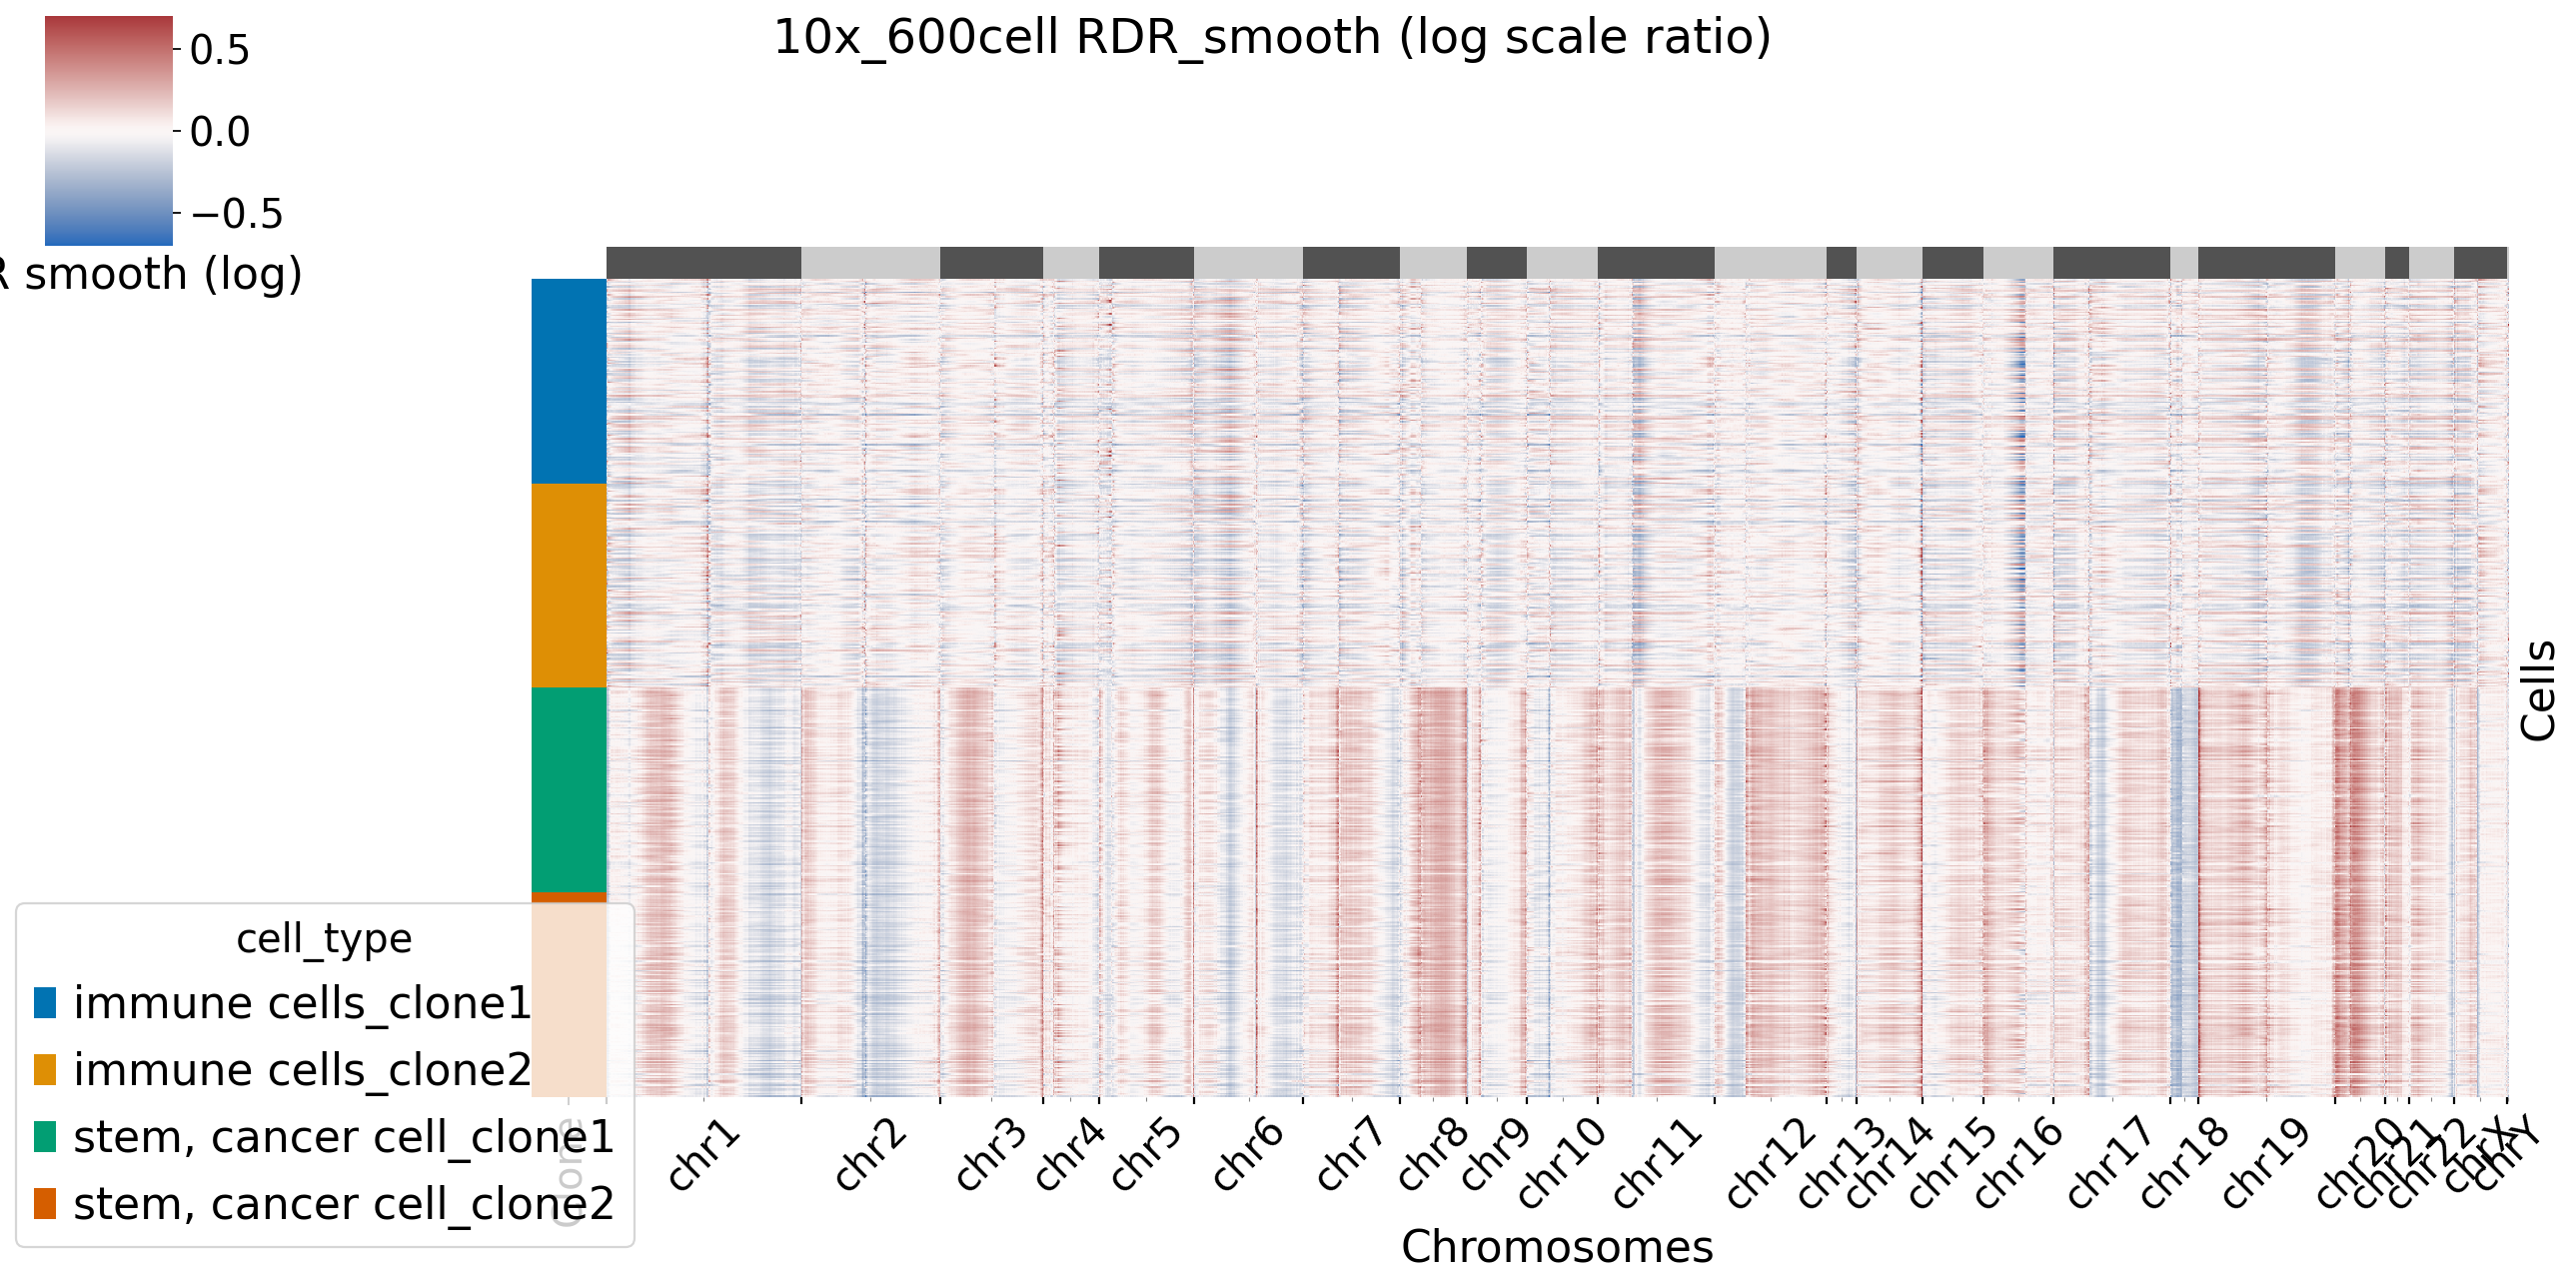

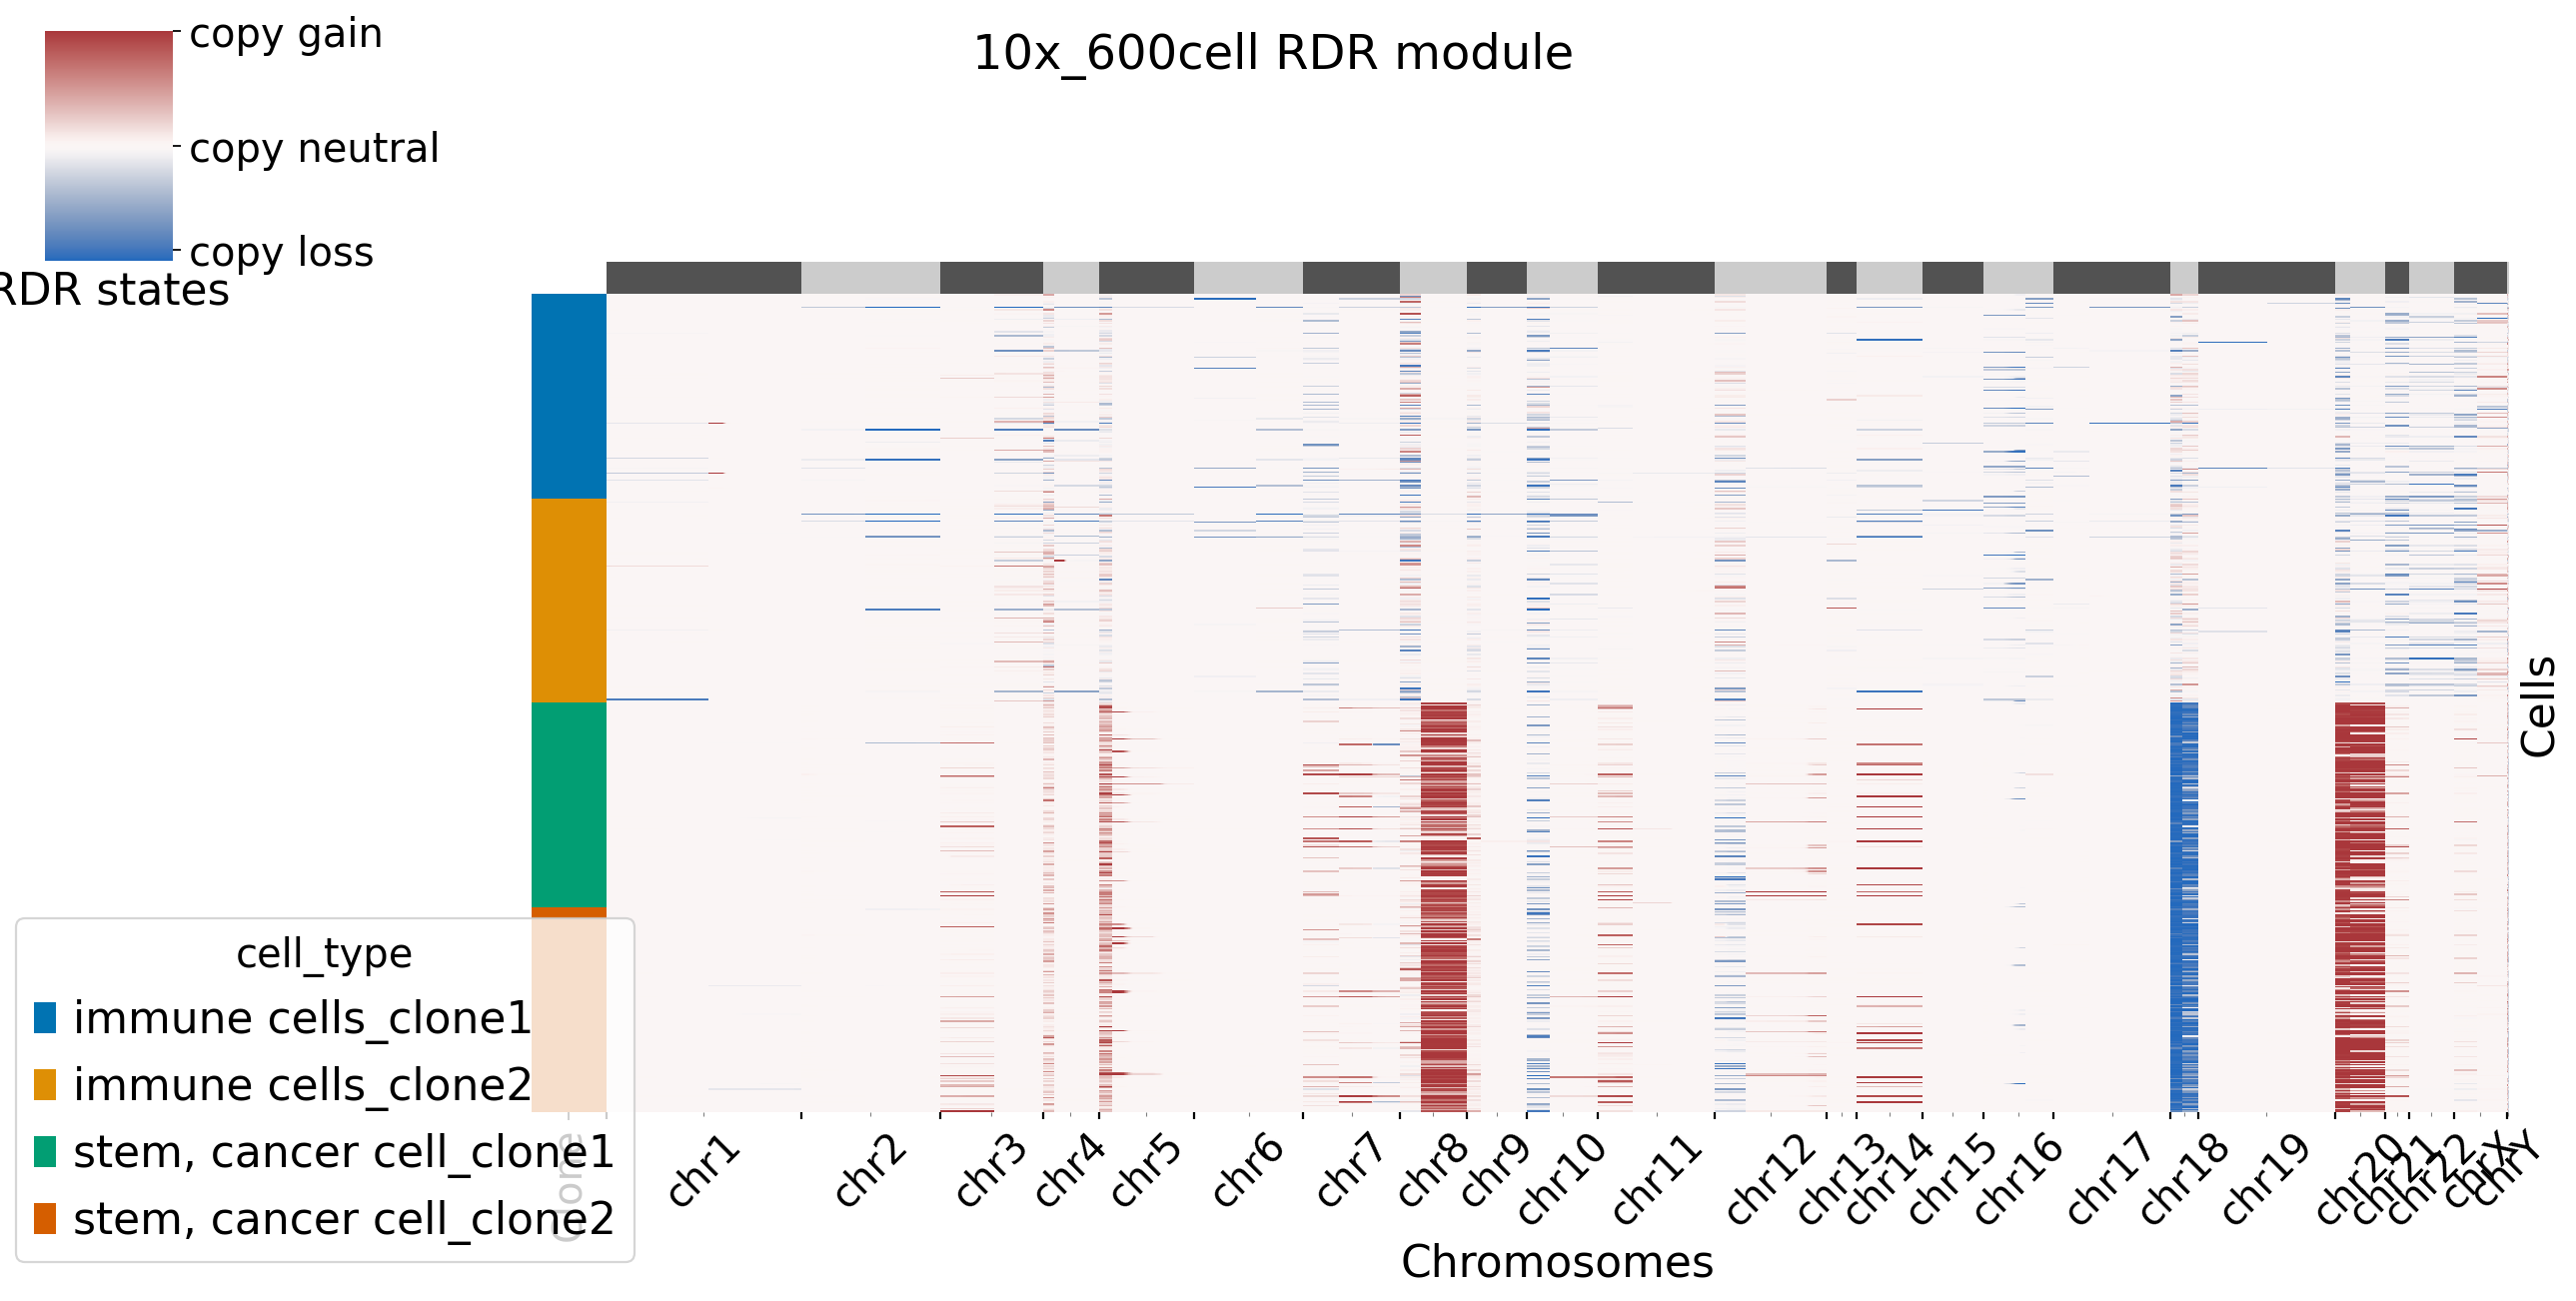

In [15]:
RDR_Xdata = xclone.model.run_RDR(RDR_adata, config_file = xconfig)